# Titanic visual exploration exercise

There exists an exhaustive record of who was onboard of the Titanic, and whether they survived or not to the sinking of the ship [1].

The file 'data/titanic.csv' contains a table with 9 columns:
* survived: 1 if passenger survived, 0 otherwise
* name: Name of the passenger
* sex: "male" or "female"
* age: Age of the passenger
* fare: Fare paid to travel on the Titanic
* class: "First", "Second", or "Third" class
* who: "child", "man", or "woman"
* adult_male: True if the passenger is an adult male (i.e., who == "man")
* alive: "yes" if the passenger survived the sinking, "no" otherwise

Use pandas, seaborn, and matplotlib to find out more about the passengers and their destiny:

1) Load the file 'data/titanic.csv' in a DataFrame

2) Show the number of children, men, and women on board as a bar plot

3) Show the number of adult males vs non-adult males, split by the class they were travelling in.
   
* Hint: Use the `order` keyword argument to order the classes as First, Second, Third.

4) Create a grid of plots showing the distribution of the age of the passengers, grouped by class (rows) and sex (columns)

5) Create a violin plot of fare price, grouped by class

6) Show the fraction of people who survived, for each of the classes.

*   Hint 1: The fraction of survivors per class is equal to the mean of the `survived` indicator variable, per class. (This is a common trick.) 

*   Hint 2: Create a `factorplot` of `'survived`' vs `'class'`, setting `kind='bar'` (display the fraction of survivor as a bar plot), and `ci=None` (remove the error bars, which are meaningless).

7) Create a row of plots showing the fraction of survivors in each class. Each plot should contain the data for children, men, or women

[1] http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
titanic = pd.read_csv('data/titanic.csv', index_col=0)
titanic.head()

,survived,name,sex,age,fare,class,who,adult_male,alive
0,0,"Braund, Mr. Owen Harris",male,22,7.2500,Third,man,True,no
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,71.2833,First,woman,False,yes
2,1,"Heikkinen, Miss. Laina",female,26,7.9250,Third,woman,False,yes
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,53.1000,First,woman,False,yes
4,0,"Allen, Mr. William Henry",male,35,8.0500,Third,man,True,no


## About the passengers

2) Show the distribution of the number of children, men, and women as a bar plot

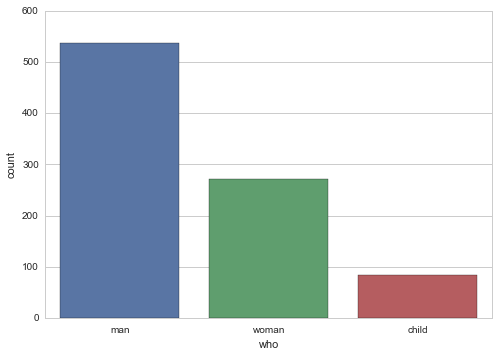

In [56]:
sns.countplot('who', data=titanic);

3) Show the number of adult males vs non-adult males, split by the class they were travelling in.

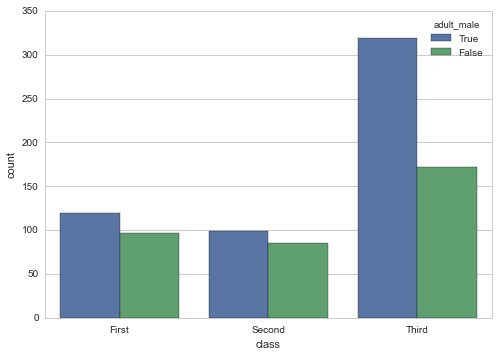

In [60]:
sns.countplot('class', data=titanic, hue='adult_male', order=['First', 'Second', 'Third']);

4) Create a grid of plots showing the distribution of the age of the passengers, grouped by class (rows) and sex (columns).

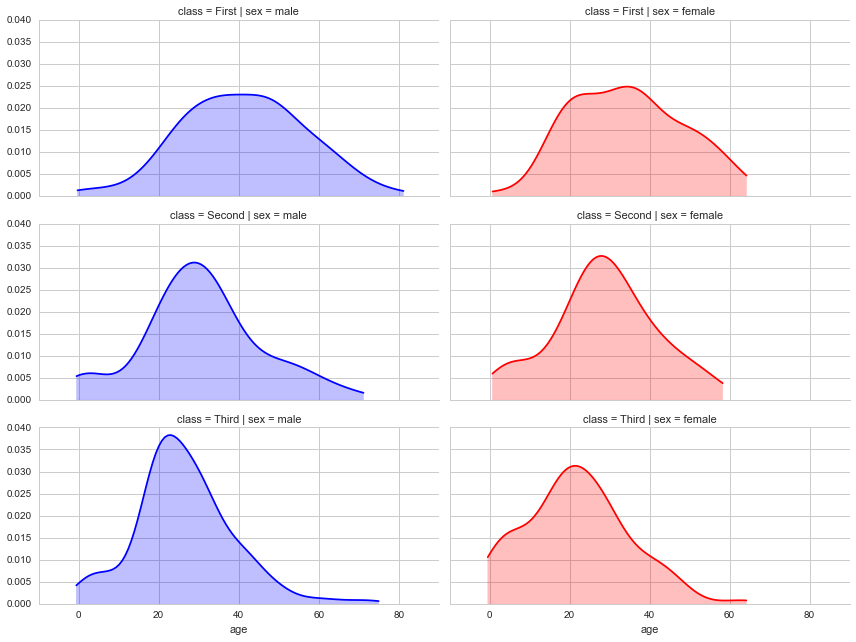

In [27]:
grid = sns.FacetGrid(titanic, row='class', col='sex', hue='sex', aspect=2.0,
                     row_order=['First', 'Second', 'Third'],
                     palette=dict(male='blue', female='red'))
grid.map(sns.kdeplot, 'age', shade=True);

5) Create a violin plot of fare price, grouped by class.

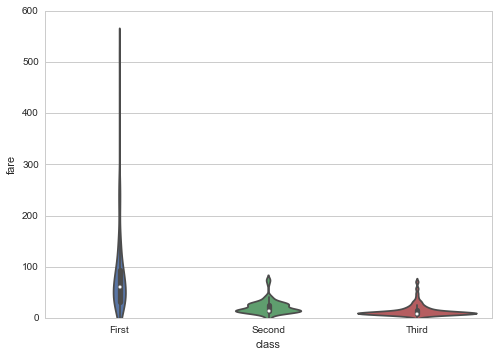

In [39]:
sns.violinplot(x='class', y='fare', data=titanic, order=['First', 'Second', 'Third'])
plt.ylim([0, 600]);

6) Show the fraction of people who survived, for each of the classes.

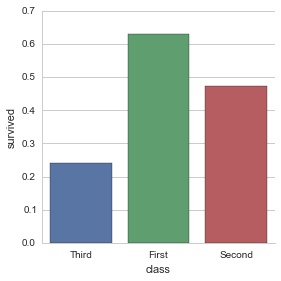

In [85]:
sns.factorplot(x='class', y='survived', data=titanic, kind='bar', ci=None);

7) Create a row of plots showing the fraction of survivors in each class. Each plot should contain the data for children, men, or women.

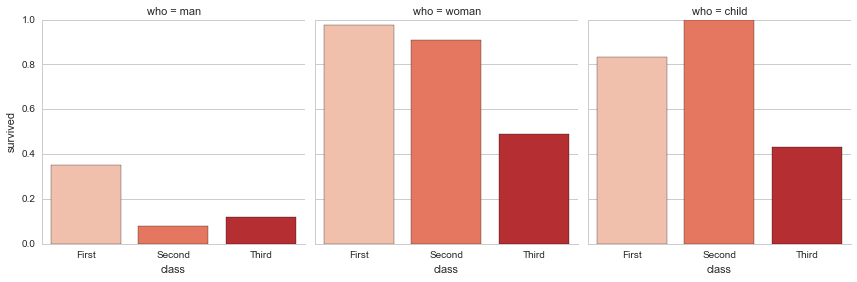

In [86]:
grid = sns.factorplot(x='class', y='survived', col='who', data=titanic, kind='bar', ci=None,
                      order=['First', 'Second', 'Third'], palette='Reds',)

Another, more explicit way of creating the plot:

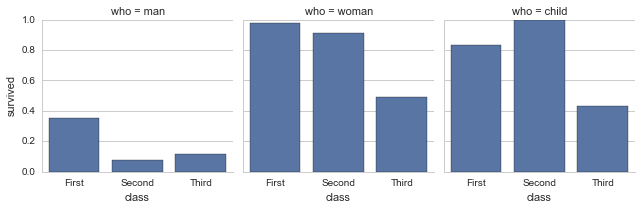

In [91]:
grid = sns.FacetGrid(titanic, col='who')
grid.map(sns.barplot, 'class', 'survived', ci=None, order=['First', 'Second', 'Third']);

For even more interesting visualizations using this dataset, visit http://nbviewer.ipython.org/gist/mwaskom/8224591 .